# Using `iDiffuse` to calculate expected photometric precisions

### Import necessary packages

In [2]:
from __future__ import print_function
import numpy as np
import pandas as pd
import sys
sys.path.append("/Users/gks/Dropbox/mypylib/notebooks/GIT/idiffuse/")
import idiffuse
import pysynphot as S

# Initialize Telescope Class that implements the ARC 3.5m at APO
Also correctly sets up the diffuser in ARCTIC (0.34 deg opening angle, at a distance of 200mm)

In [3]:
arc = idiffuse.telescope.TelescopeARC()

In [4]:
# Print descriptive text about the telescope
print(arc)

Telescope: 			ARC 3.5m
Throughput (flat) (%): 		39.838
Diameter (cm):			350.000
Fnum: 				8.000
Focal length (m): 		28.000
Gain: 				2.000
Pixel size (um): 		15.000
Num pixels: 			4096.000
Plate scale (arcsec/pix): 	0.110
FOV (arcmin): 			7.509
Dark Noise (e/s/pix): 		0.000
Read Noise (e/pix):   		3.700
Altitude (m):   		2788.000
Central Obstruction (%): 	9.000
Diffuser dist to detector (mm):	200.000
11 available filters in folder:	/Users/gks/Dropbox/mypylib/notebooks/GIT/idiffuse/idiffuse/filters



In [5]:
# Get available filter filenames
# These are also accessable through the arc.FILT_DICT dictionary
arc.get_filter_filenames()

['/Users/gks/Dropbox/mypylib/notebooks/GIT/idiffuse/idiffuse/filters/arctic_qe.txt',
 '/Users/gks/Dropbox/mypylib/notebooks/GIT/idiffuse/idiffuse/filters/bess-b.txt',
 '/Users/gks/Dropbox/mypylib/notebooks/GIT/idiffuse/idiffuse/filters/bess-i.txt',
 '/Users/gks/Dropbox/mypylib/notebooks/GIT/idiffuse/idiffuse/filters/bess-r.txt',
 '/Users/gks/Dropbox/mypylib/notebooks/GIT/idiffuse/idiffuse/filters/bess-u.txt',
 '/Users/gks/Dropbox/mypylib/notebooks/GIT/idiffuse/idiffuse/filters/bess-v.txt',
 '/Users/gks/Dropbox/mypylib/notebooks/GIT/idiffuse/idiffuse/filters/semrock_857_30.txt',
 '/Users/gks/Dropbox/mypylib/notebooks/GIT/idiffuse/idiffuse/filters/sloan_g_filter.txt',
 '/Users/gks/Dropbox/mypylib/notebooks/GIT/idiffuse/idiffuse/filters/sloan_i_filter.txt',
 '/Users/gks/Dropbox/mypylib/notebooks/GIT/idiffuse/idiffuse/filters/sloan_r_filter.txt',
 '/Users/gks/Dropbox/mypylib/notebooks/GIT/idiffuse/idiffuse/filters/sloan_z_filter.txt']

### Plot Telescope QE / Throughput plot for given filters

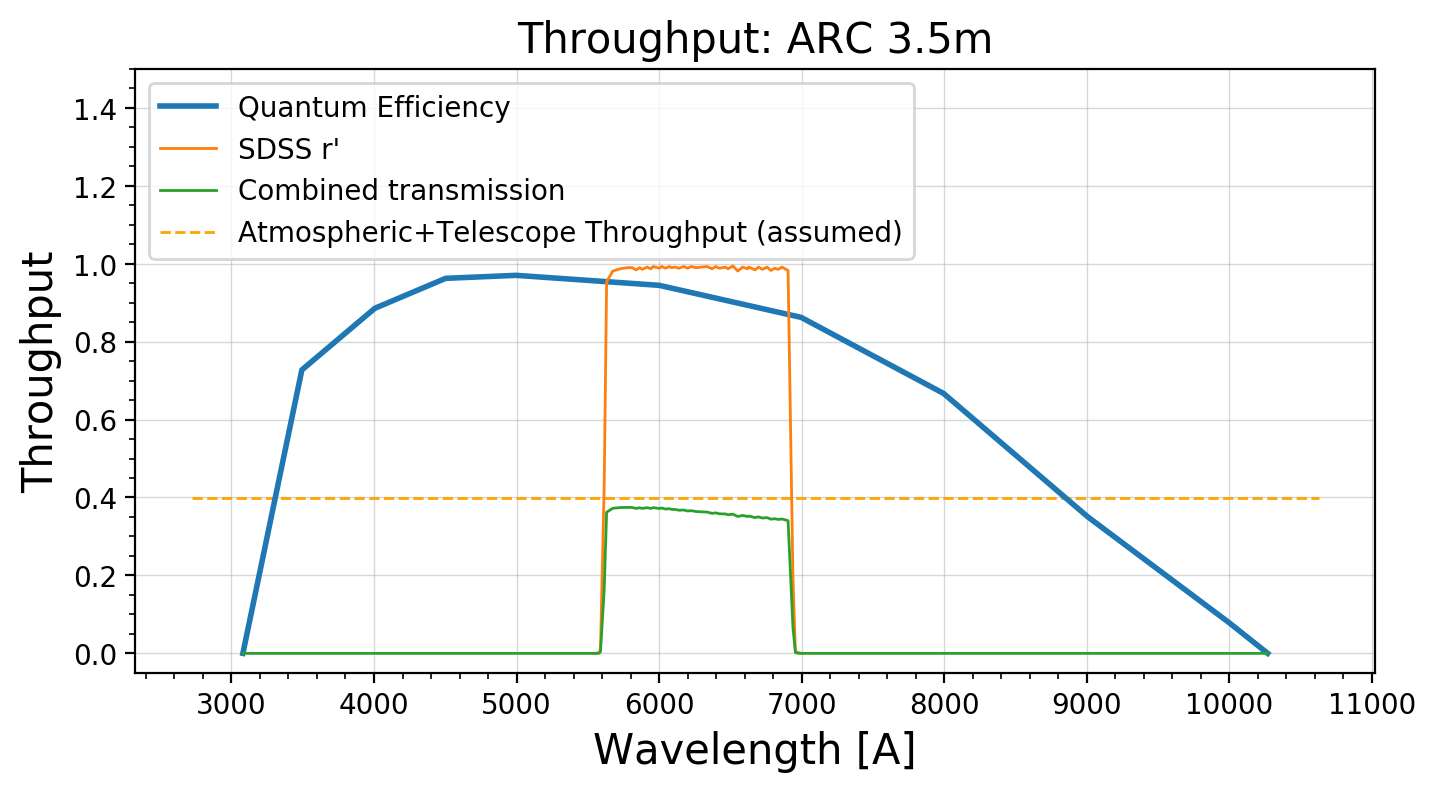

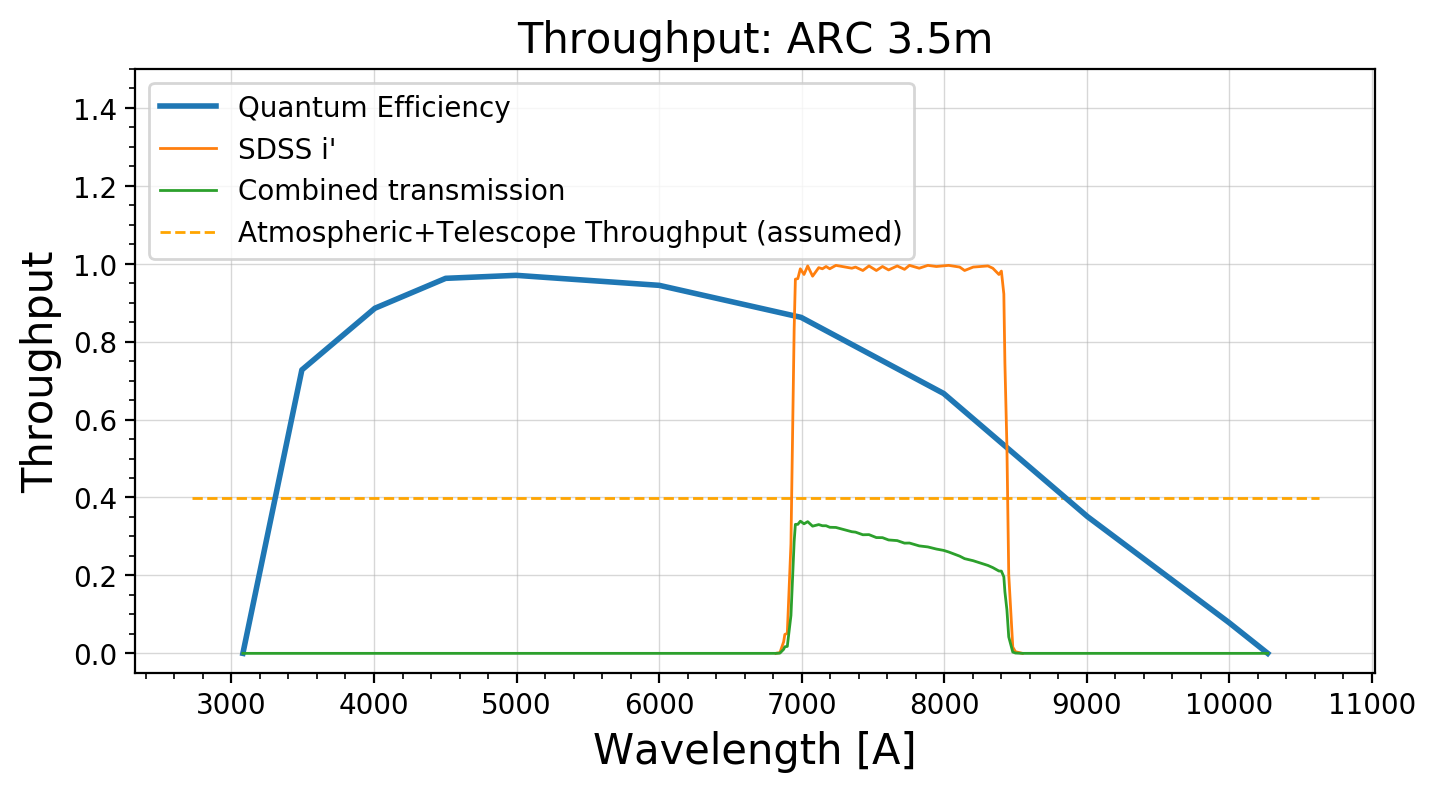

In [6]:
# use FILT_DICT dictionary
ifilt = S.FileBandpass(arc.FILTER_DICT['sloan_i_filter.txt'])
rfilt = S.FileBandpass(arc.FILTER_DICT['sloan_r_filter.txt'])

arc.plot_throughput(bandpass=rfilt,bandpass_name="SDSS r'")
arc.plot_throughput(bandpass=ifilt,bandpass_name="SDSS i'")

# Example on-sky diffuser assisted precision 

### K2-28b

In [18]:
err, cad = arc.get_err_cad_for_adu(vegamag=13.8,
                        BandPass=ifilt,
                        binning=4,
                        max_adu_per_pixel=2800.,
                        read_time=2.7,
                        airmass=1.3,
                        num_ref_stars=3.,
                        sky_mag_per_arcsec=19.7)

(((/Users/gks/Dropbox/mypylib/notebooks/GIT/idiffuse/idiffuse/filters/arctic_qe.txt * 0.398378) * ../idiffuse/filters/sloan_i_filter.txt)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(((/Users/gks/Dropbox/mypylib/notebooks/GIT/idiffuse/idiffuse/filters/arctic_qe.txt * 0.398378) * ../idiffuse/filters/sloan_i_filter.txt)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
##### Exptime #####
Exptime [s]:                  29.954
Total cadence [s]:            32.654
Obs. Efficiency [%]:          91.73
npix [pix]:                   307.30
n_b [pix]:                    537.77

##### Counts #####
Star counts - Total [adu]:    860439.86 
Star counts - /pix [adu/pix]: 2800.00 
Sky counts - Total [adu]:     223454.12
Sky counts - /pix [adu/pix]:  727.15

##### Noise in exptime=29.95s ######
Photometric noise [ppm]       1045.96
Photon noise [ppm]:           880.23
Scintillation noise [p

## TRES-3b

In [19]:
err, cad = arc.get_err_cad_for_adu(vegamag=11.2,
                        BandPass=ifilt,
                        binning=4,
                        max_adu_per_pixel=27000.,
                        read_time=2.7,
                        airmass=1.2,
                        num_ref_stars=13.,
                        sky_mag_per_arcsec=19.7)

(((/Users/gks/Dropbox/mypylib/notebooks/GIT/idiffuse/idiffuse/filters/arctic_qe.txt * 0.398378) * ../idiffuse/filters/sloan_i_filter.txt)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(((/Users/gks/Dropbox/mypylib/notebooks/GIT/idiffuse/idiffuse/filters/arctic_qe.txt * 0.398378) * ../idiffuse/filters/sloan_i_filter.txt)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
##### Exptime #####
Exptime [s]:                  26.343
Total cadence [s]:            29.043
Obs. Efficiency [%]:          90.70
npix [pix]:                   307.30
n_b [pix]:                    537.77

##### Counts #####
Star counts - Total [adu]:    8297098.66 
Star counts - /pix [adu/pix]: 27000.00 
Sky counts - Total [adu]:     196514.27
Sky counts - /pix [adu/pix]:  639.49

##### Noise in exptime=26.34s ######
Photometric noise [ppm]       259.50
Photon noise [ppm]:           254.75
Scintillation noise [

## WASP-85 A b

In [20]:
err, cad = arc.get_err_cad_for_adu(vegamag=10.0,
                        BandPass=rfilt,
                        binning=4,
                        max_adu_per_pixel=20000.,
                        read_time=2.7,
                        airmass=1.3,
                        num_ref_stars=3.,
                        sky_mag_per_arcsec=19.7)

(((/Users/gks/Dropbox/mypylib/notebooks/GIT/idiffuse/idiffuse/filters/arctic_qe.txt * 0.398378) * ../idiffuse/filters/sloan_r_filter.txt)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(((/Users/gks/Dropbox/mypylib/notebooks/GIT/idiffuse/idiffuse/filters/arctic_qe.txt * 0.398378) * ../idiffuse/filters/sloan_r_filter.txt)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
##### Exptime #####
Exptime [s]:                  3.896
Total cadence [s]:            6.596
Obs. Efficiency [%]:          59.07
npix [pix]:                   307.30
n_b [pix]:                    537.77

##### Counts #####
Star counts - Total [adu]:    6145999.01 
Star counts - /pix [adu/pix]: 20000.00 
Sky counts - Total [adu]:     48201.48
Sky counts - /pix [adu/pix]:  156.85

##### Noise in exptime=3.90s ######
Photometric noise [ppm]       331.46
Photon noise [ppm]:           329.35
Scintillation noise [ppm]

## K2-100b 

In [21]:
err, cad = arc.get_err_cad_for_adu(vegamag=10.0,
                        BandPass=ifilt,
                        binning=4,
                        max_adu_per_pixel=23000.,
                        read_time=2.7,
                        airmass=1.05,
                        num_ref_stars=10.,
                        sky_mag_per_arcsec=19.7)

(((/Users/gks/Dropbox/mypylib/notebooks/GIT/idiffuse/idiffuse/filters/arctic_qe.txt * 0.398378) * ../idiffuse/filters/sloan_i_filter.txt)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
(((/Users/gks/Dropbox/mypylib/notebooks/GIT/idiffuse/idiffuse/filters/arctic_qe.txt * 0.398378) * ../idiffuse/filters/sloan_i_filter.txt)) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.
##### Exptime #####
Exptime [s]:                  7.431
Total cadence [s]:            10.131
Obs. Efficiency [%]:          73.35
npix [pix]:                   307.30
n_b [pix]:                    537.77

##### Counts #####
Star counts - Total [adu]:    7067898.86 
Star counts - /pix [adu/pix]: 23000.00 
Sky counts - Total [adu]:     55431.70
Sky counts - /pix [adu/pix]:  180.38

##### Noise in exptime=7.43s ######
Photometric noise [ppm]       280.74
Photon noise [ppm]:           278.96
Scintillation noise [ppm